In [0]:
from pyspark.sql.types import StructField, StructType, IntegerType, StringType, BooleanType, DateType
from pyspark.sql import SparkSession
from pyspark.sql.functions import *
from pyspark.sql.window import *
# Create Spark session
spark = SparkSession.builder.appName("IPL Data Analysis").getOrCreate()

# Define the schema
ball_by_ball_schema = StructType([
    StructField("match_id", IntegerType(), True),
    StructField("over_id", IntegerType(), True),
    StructField("ball_id", IntegerType(), True),
    StructField("innings_no", IntegerType(), True),
    StructField("team_batting", StringType(), True),
    StructField("team_bowling", StringType(), True),
    StructField("striker_batting_position", IntegerType(), True),
    StructField("extra_type", StringType(), True),
    StructField("runs_scored", IntegerType(), True),
    StructField("extra_runs", IntegerType(), True),
    StructField("wides", IntegerType(), True),
    StructField("legbyes", IntegerType(), True),
    StructField("byes", IntegerType(), True),
    StructField("noballs", IntegerType(), True),
    StructField("penalty", IntegerType(), True),
    StructField("bowler_extras", IntegerType(), True),
    StructField("out_type", StringType(), True),
    StructField("caught", BooleanType(), True),
    StructField("bowled", BooleanType(), True),
    StructField("run_out", BooleanType(), True),
    StructField("lbw", BooleanType(), True),
    StructField("retired_hurt", BooleanType(), True),
    StructField("stumped", BooleanType(), True),
    StructField("caught_and_bowled", BooleanType(), True),
    StructField("hit_wicket", BooleanType(), True),
    StructField("obstructingfeild", BooleanType(), True),
    StructField("bowler_wicket", BooleanType(), True),
    StructField("match_date", DateType(), True),
    StructField("season", IntegerType(), True),
    StructField("striker", IntegerType(), True),
    StructField("non_striker", IntegerType(), True),
    StructField("bowler", IntegerType(), True),
    StructField("player_out", IntegerType(), True),
    StructField("fielders", IntegerType(), True),
    StructField("striker_match_sk", IntegerType(), True),
    StructField("strikersk", IntegerType(), True),
    StructField("nonstriker_match_sk", IntegerType(), True),
    StructField("nonstriker_sk", IntegerType(), True),
    StructField("fielder_match_sk", IntegerType(), True),
    StructField("fielder_sk", IntegerType(), True),
    StructField("bowler_match_sk", IntegerType(), True),
    StructField("bowler_sk", IntegerType(), True),
    StructField("playerout_match_sk", IntegerType(), True),
    StructField("battingteam_sk", IntegerType(), True),
    StructField("bowlingteam_sk", IntegerType(), True),
    StructField("keeper_catch", BooleanType(), True),
    StructField("player_out_sk", IntegerType(), True),
    StructField("matchdatesk", DateType(), True)
])

# Load the data
ball_by_ball_df = spark.read.schema(ball_by_ball_schema).format("csv").option("header", "true").load("s3://ipl-data-analysis-project/Ball_By_Ball.csv")

 
#ball_by_ball_df.show(5)
 
# Define the match schema
match_schema = StructType([
    StructField("match_sk", IntegerType(), True),
    StructField("match_id", IntegerType(), True),
    StructField("team1", StringType(), True),
    StructField("team2", StringType(), True),
    StructField("match_date", DateType(), True),
    StructField("season_year", IntegerType(), True),
    StructField("venue_name", StringType(), True),
    StructField("city_name", StringType(), True),
    StructField("country_name", StringType(), True),
    StructField("toss_winner", StringType(), True),
    StructField("match_winner", StringType(), True),
    StructField("toss_name", StringType(), True),
    StructField("win_type", StringType(), True),
    StructField("outcome_type", StringType(), True),
    StructField("manofmach", StringType(), True),
    StructField("win_margin", IntegerType(), True),
    StructField("country_id", IntegerType(), True)
])

# Define the player schema
player_schema = StructType([
    StructField("player_sk", IntegerType(), True),
    StructField("player_id", IntegerType(), True),
    StructField("player_name", StringType(), True),
    StructField("dob", DateType(), True),
    StructField("batting_hand", StringType(), True),
    StructField("bowling_skill", StringType(), True),
    StructField("country_name", StringType(), True)
])

# Define the player-match schema
player_match_schema = StructType([
    StructField("player_match_sk", IntegerType(), True),
    StructField("playermatch_key", DecimalType(), True),
    StructField("match_id", IntegerType(), True),
    StructField("player_id", IntegerType(), True),
    StructField("player_name", StringType(), True),
    StructField("dob", DateType(), True),
    StructField("batting_hand", StringType(), True),
    StructField("bowling_skill", StringType(), True),
    StructField("country_name", StringType(), True),
    StructField("role_desc", StringType(), True),
    StructField("player_team", StringType(), True),
    StructField("opposit_team", StringType(), True),
    StructField("season_year", IntegerType(), True),
    StructField("is_manofthematch", BooleanType(), True),
    StructField("age_as_on_match", IntegerType(), True),
    StructField("isplayers_team_won", BooleanType(), True),
    StructField("batting_status", StringType(), True),
    StructField("bowling_status", StringType(), True),
    StructField("player_captain", StringType(), True),
    StructField("opposit_captain", StringType(), True),
    StructField("player_keeper", StringType(), True),
    StructField("opposit_keeper", StringType(), True)
])

# Define the team schema
team_schema = StructType([
    StructField("team_sk", IntegerType(), True),
    StructField("team_id", IntegerType(), True),
    StructField("team_name", StringType(), True)
])

# Load the ball-by-ball data
ball_by_ball_df = spark.read.schema(ball_by_ball_schema).format("csv").option("header", "true").load("s3://ipl-data-analysis-project/Ball_By_Ball.csv")

# Load the match data
match_df = spark.read.schema(match_schema).format("csv").option("header", "true").load("s3://ipl-data-analysis-project/Match.csv")

# Load the player data
player_df = spark.read.schema(player_schema).format("csv").option("header", "true").load("s3://ipl-data-analysis-project/Player.csv")

# Load the player-match data
player_match_df = spark.read.schema(player_match_schema).format("csv").option("header", "true").load("s3://ipl-data-analysis-project/Player_match.csv")

# Load the team data
team_df = spark.read.schema(team_schema).format("csv").option("header", "true").load("s3://ipl-data-analysis-project/Team.csv")

# Show the DataFrames schema
#ball_by_ball_df.show(5)
#match_df.show(5)
#player_df.show(5)
#player_match_df.show(5)
#team_df.show(5)

#filtering wides and NB
ball_by_ball_df=ball_by_ball_df.filter((col("wides")==0) & (col("noballs")==0))

total_and_avg_runs =ball_by_ball_df.groupBy("match_id","innings_no").agg(
    sum("runs_scored").alias("total_runs"),
    avg("runs_scored").alias("average_runs")
)


#running total

windowSpec= Window.partitionBy ("match_id","innings_no").orderBy("over_id")

ball_by_ball_df = ball_by_ball_df.withColumn(
    "running_total_runs",
    sum("runs_scored").over(windowSpec)


)


# Conditional Column - impact ball

ball_by_ball_df=ball_by_ball_df.withColumn(
    "high_impact",
    #when((col("runs_scored")+col("extra_runs")> 6 |(col("bowler_wicket")==True),True).otherwise(False)
         
    when((col("runs_scored") + col("extra_runs") > 6) | (col("bowler_wicket") == True), True).otherwise(False)     
         )

ball_by_ball_df.show(5)


# Categorize win margins into 'High', 'Medium', and 'Low'
match_df = match_df.withColumn(
    "win_margin_category",
    when(col("win_margin") >= 100, "High")
    .when((col("win_margin") >= 50) & (col("win_margin") < 100), "Medium")
    .otherwise("Low")
)

# Analyze the impact of the toss: whether the toss winner also wins the match
match_df = match_df.withColumn(
    "toss_match_winner",
    when(col("toss_winner") == col("match_winner"), "Yes")
    .otherwise("No")
)

# Show the enhanced match DataFrame
match_df.show(2)


# Normalize and clean player names
player_df = player_df.withColumn(
    "player_name",
    lower(regexp_replace("player_name", "[^a-zA-Z0-9 ]", ""))
)

# Handle missing values in 'batting_hand' and 'bowling_skill' with a default 'unknown'
player_df = player_df.na.fill({
    "batting_hand": "unknown",
    "bowling_skill": "unknown"
})

# Categorize players based on batting hand
player_df = player_df.withColumn(
    "batting_style",
    when(col("batting_hand").contains("left"), "Left-Handed")
    .otherwise("Right-Handed")
)

# Show the modified player DataFrame
player_df.show(2)


# Add a 'veteran_status' column based on player age
player_match_df = player_match_df.withColumn(
    "veteran_status",
    when(col("age_as_on_match") >= 35, "Veteran")
    .otherwise("Non-Veteran")
)

# Calculate years since debut dynamically
player_match_df = player_match_df.withColumn(
    "years_since_debut",
    year(current_date()) - col("season_year")
)

# Show the enriched DataFrame
player_match_df.show()

# Create or replace temporary views for DataFrames
ball_by_ball_df.createOrReplaceTempView("ball_by_ball")
match_df.createOrReplaceTempView("match")
player_df.createOrReplaceTempView("player")
player_match_df.createOrReplaceTempView("player_match")
team_df.createOrReplaceTempView("team")

# Query to get top scoring batsmen per season
top_scoring_batsmen_per_season = spark.sql("""
    SELECT 
        p.player_name,
        m.season_year,
        SUM(b.runs_scored) AS total_runs
    FROM ball_by_ball b
    JOIN match m ON b.match_id = m.match_id
    JOIN player_match pm ON m.match_id = pm.match_id AND b.striker = pm.player_id
    JOIN player p ON p.player_id = pm.player_id
    GROUP BY p.player_name, m.season_year
    ORDER BY m.season_year, total_runs DESC
""")


# Query to get economical bowlers in the powerplay
economical_bowlers_powerplay = spark.sql("""
    SELECT 
        p.player_name,
        AVG(b.runs_scored) AS avg_runs_per_ball,
        COUNT(b.bowler_wicket) AS total_wickets
    FROM ball_by_ball b
    JOIN player_match pm ON b.match_id = pm.match_id AND b.bowler = pm.player_id
    JOIN player p ON pm.player_id = p.player_id
    WHERE b.over_id <= 6
    GROUP BY p.player_name
    HAVING COUNT(*) >= 1
    ORDER BY avg_runs_per_ball, total_wickets DESC
""")

# Display the results
economical_bowlers_powerplay.show()

# Display the top 30 records from the top scoring batsmen per season DataFrame
top_scoring_batsmen_per_season.show(30)

# Query to analyze the impact of the toss on individual matches
toss_impact_individual_matches = spark.sql("""
    SELECT 
        m.match_id,
        m.toss_winner,
        m.toss_name,
        m.match_winner,
        CASE 
            WHEN m.toss_winner = m.match_winner THEN 'Won'
            ELSE 'Lost'
        END AS match_outcome
    FROM match m
    WHERE m.toss_name IS NOT NULL
    ORDER BY m.match_id
""")

# Display the results
toss_impact_individual_matches.show()



# Query to calculate average runs scored in wins
average_runs_in_wins = spark.sql("""
    SELECT 
        p.player_name,
        AVG(b.runs_scored) AS avg_runs_in_wins,
        COUNT(*) AS innings_played
    FROM ball_by_ball b
    JOIN player_match pm ON b.match_id = pm.match_id AND b.striker = pm.player_id
    JOIN player p ON pm.player_id = p.player_id
    JOIN match m ON pm.match_id = m.match_id
    WHERE m.match_winner = pm.player_team
    GROUP BY p.player_name
    ORDER BY avg_runs_in_wins ASC
""")

# Display the results
average_runs_in_wins.show()



+---------------+------------------+-------------+
|    player_name| avg_runs_per_ball|total_wickets|
+---------------+------------------+-------------+
|     sm harwood|0.3333333333333333|            0|
|     ankit soni|               0.5|            0|
|      gr napier|               0.5|            0|
|       aj finch|               0.5|            0|
|        a zampa|               0.5|            0|
|     avesh khan|               0.5|            0|
|       nb singh|0.5833333333333334|            0|
|     ag murtaza|0.6538461538461539|            0|
|      sb bangar|0.6666666666666666|            0|
|     d du preez|0.6666666666666666|            0|
|        s gopal|0.6666666666666666|            0|
|     fh edwards|0.6923076923076923|            0|
|       a kumble|0.7685185185185185|            0|
|j syed mohammad|0.7777777777777778|            0|
|   kp pietersen|0.7777777777777778|            0|
|       umar gul|0.7777777777777778|            0|
|  la carseldine|0.833333333333

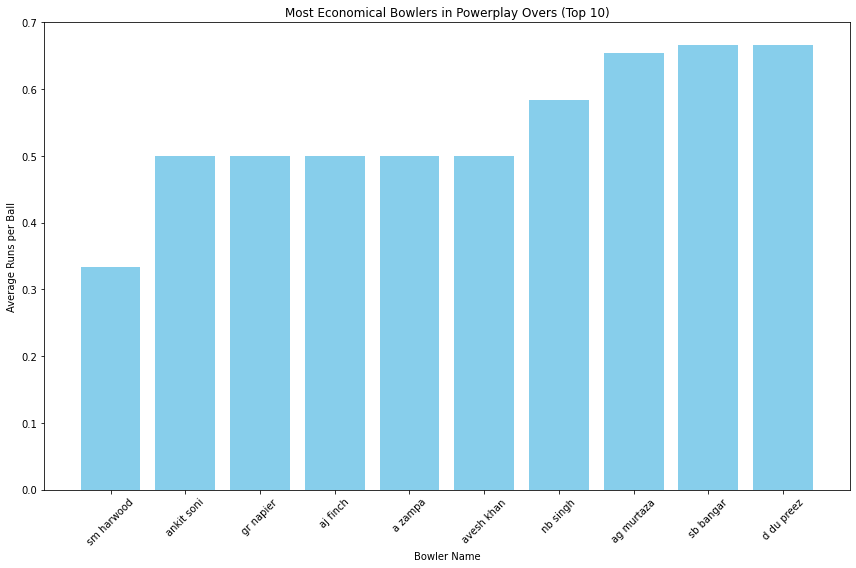

In [0]:
import matplotlib.pyplot as plt

# Assuming 'economical_bowlers_powerplay' is already executed and available as a Spark DataFrame
economical_bowlers_pd = economical_bowlers_powerplay.toPandas()

# Visualizing using Matplotlib
plt.figure(figsize=(12, 8))

# Limiting to top 10 for clarity in the plot
top_economical_bowlers = economical_bowlers_pd.nsmallest(10, 'avg_runs_per_ball')

plt.bar(top_economical_bowlers['player_name'], top_economical_bowlers['avg_runs_per_ball'], color='skyblue')
plt.xlabel('Bowler Name')
plt.ylabel('Average Runs per Ball')
plt.title('Most Economical Bowlers in Powerplay Overs (Top 10)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


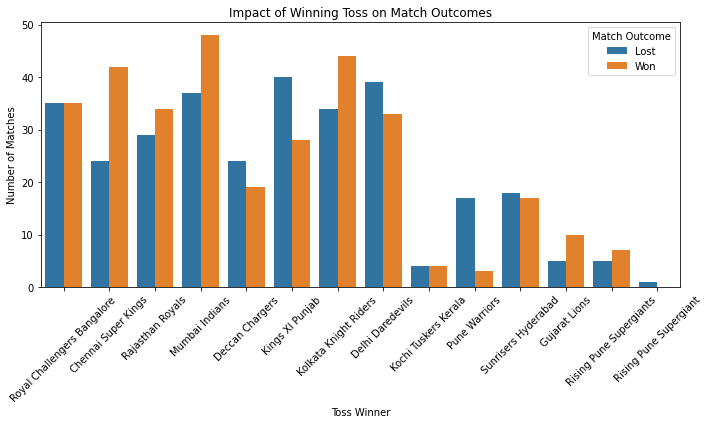

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'toss_impact_individual_matches' is already executed and available as a Spark DataFrame
toss_impact_pd = toss_impact_individual_matches.toPandas()

# Creating a countplot to show win/loss after winning toss
plt.figure(figsize=(10, 6))
sns.countplot(x='toss_winner', hue='match_outcome', data=toss_impact_pd)
plt.title('Impact of Winning Toss on Match Outcomes')
plt.xlabel('Toss Winner')
plt.ylabel('Number of Matches')
plt.legend(title='Match Outcome')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


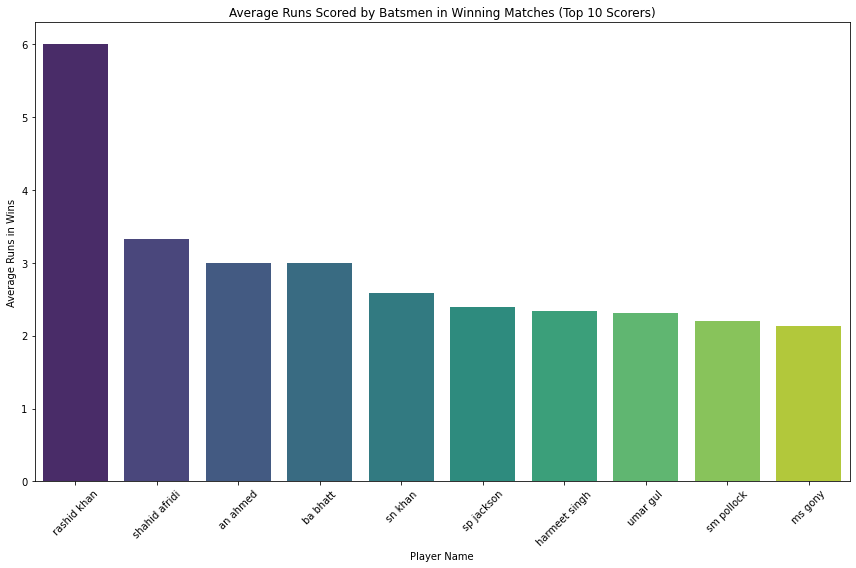

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'average_runs_in_wins' is already executed and available as a Spark DataFrame
average_runs_pd = average_runs_in_wins.toPandas()

# Using Seaborn to plot average runs in winning matches
plt.figure(figsize=(12, 8))
top_scorers = average_runs_pd.nlargest(10, 'avg_runs_in_wins')
sns.barplot(x='player_name', y='avg_runs_in_wins', data=top_scorers, palette='viridis')
plt.title('Average Runs Scored by Batsmen in Winning Matches (Top 10 Scorers)')
plt.xlabel('Player Name')
plt.ylabel('Average Runs in Wins')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [0]:
# Execute SQL Query to get average and highest scores by venue
scores_by_venue = spark.sql("""
    SELECT 
        venue_name,
        AVG(total_runs) AS average_score,
        MAX(total_runs) AS highest_score
    FROM (
        SELECT 
            ball_by_ball.match_id,
            match.venue_name,
            SUM(runs_scored) AS total_runs
        FROM ball_by_ball
        JOIN match ON ball_by_ball.match_id = match.match_id
        GROUP BY ball_by_ball.match_id, match.venue_name
    )
    GROUP BY venue_name
    ORDER BY average_score DESC
""")


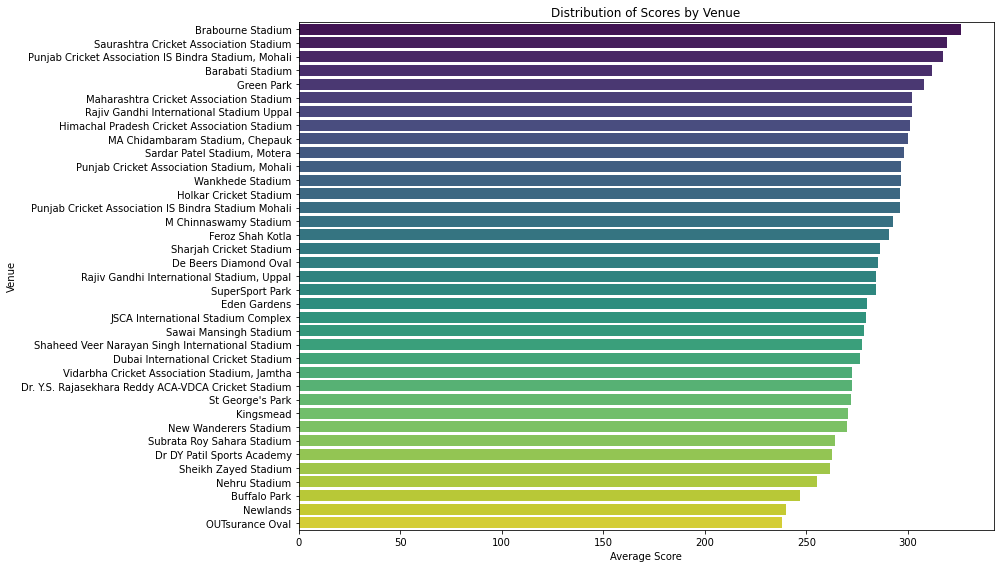

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert to Pandas DataFrame
scores_by_venue_pd = scores_by_venue.toPandas()

# Plotting the distribution of scores by venue
plt.figure(figsize=(14, 8))
sns.barplot(x='average_score', y='venue_name', data=scores_by_venue_pd, palette='viridis')
plt.title('Distribution of Scores by Venue')
plt.xlabel('Average Score')
plt.ylabel('Venue')
plt.tight_layout()
plt.show()


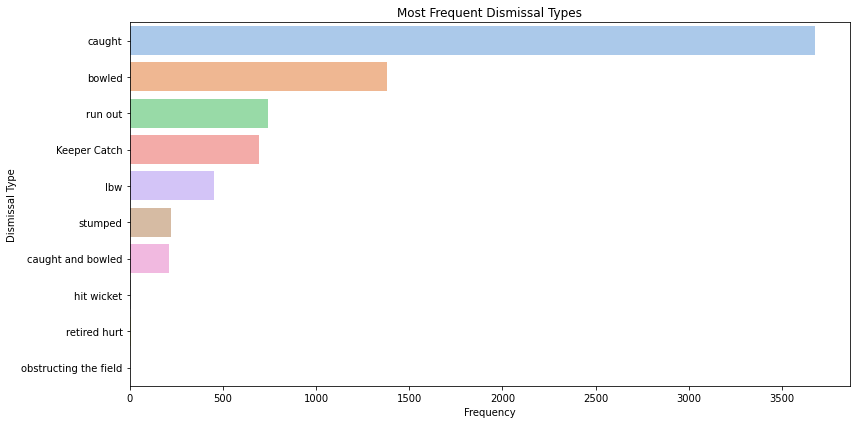

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt

# Execute SQL Query to get frequency of dismissal types
dismissal_types = spark.sql("""
    SELECT 
        out_type,
        COUNT(*) AS frequency
    FROM ball_by_ball
    WHERE out_type IS NOT NULL
    and out_type<>'Not Applicable'
    GROUP BY out_type
    ORDER BY frequency DESC
""")

# Convert to Pandas DataFrame
dismissal_types_pd = dismissal_types.toPandas()

# Plotting the most frequent dismissal types
plt.figure(figsize=(12, 6))
sns.barplot(x='frequency', y='out_type', data=dismissal_types_pd, palette='pastel')
plt.title('Most Frequent Dismissal Types')
plt.xlabel('Frequency')
plt.ylabel('Dismissal Type')
plt.tight_layout()
plt.show()


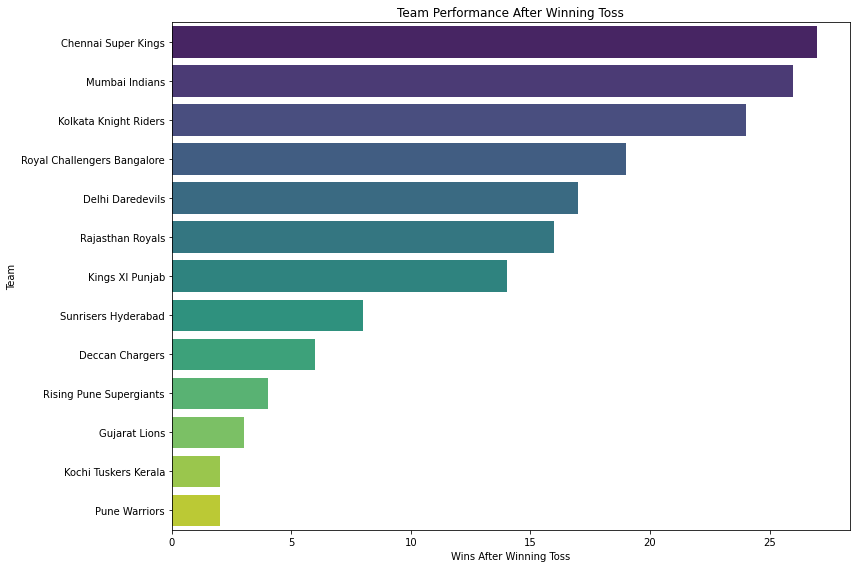

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt

# Execute SQL Query to get team performance after winning the toss
team_toss_win_performance = spark.sql("""
    SELECT 
        team1,
        COUNT(*) AS matches_played,
        SUM(CASE WHEN toss_winner = match_winner THEN 1 ELSE 0 END) AS wins_after_toss
    FROM match
    WHERE toss_winner = team1
    GROUP BY team1
    ORDER BY wins_after_toss DESC
""")

# Convert to Pandas DataFrame
team_toss_win_pd = team_toss_win_performance.toPandas()

# Plotting team performance after winning the toss
plt.figure(figsize=(12, 8))
sns.barplot(x='wins_after_toss', y='team1', data=team_toss_win_pd, palette='viridis')
plt.title('Team Performance After Winning Toss')
plt.xlabel('Wins After Winning Toss')
plt.ylabel('Team')
plt.tight_layout()
plt.show()
